In [1]:
#Import all the dependencies
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch import nn
import torch
import torchvision.transforms as t
import torchvision
import torch.optim as optim
import torch.nn.functional as f
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Loading the MNIST dataset and tranforming into the tensor
traindata=datasets.MNIST(root='data',transform=ToTensor(),train=True,download=True)
testdata=datasets.MNIST(root='data',transform=ToTensor(),train=False,download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:08<00:00, 1111075.72it/s]


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 67660.95it/s]


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 931748.03it/s] 


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [3]:
#Dataloader for creating the batches of the dataset
trainloader=torch.utils.data.DataLoader(traindata,batch_size=1000,shuffle=True)
testloader=torch.utils.data.DataLoader(testdata,batch_size=1000,shuffle=False)


In [4]:
#Implementation of the neutral network,class of network
class net(nn.Module):
  def __init__(self):
    super(net,self).__init__()
    self.l1=nn.Linear(28*28,128)
    self.dropout = nn.Dropout(p=0.5) #dropoutlayer
    self.l2=nn.Linear(128,64)

    self.l3=nn.Linear(64,10)

  def forward(self,x):
    x=x.view(-1,28*28) # Flatten the input
    x=torch.relu(self.l1(x))
    x=self.dropout(x)
    x=torch.relu(self.l2(x))
    x=self.l3(x)  #output layer
    return x


In [5]:
#Initializing the network and the optimizer and defining the crossentropyloss
network=net()
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(network.parameters(),lr=0.001)
costs=[]
#Training loop
for epoch in range(100):
  network.train()  # Set the model to training mode
  total_loss = 0.0
  for x,y in trainloader:
    optimizer.zero_grad()
    output=network(x)
    loss=criterion(output,y)
    loss.backward()
    optimizer.step()
    total_loss += loss.item()  # Accumulate loss
  avg_loss = total_loss / len(trainloader)
  costs.append(avg_loss)
  if(epoch%10==0):
    print(f'cost value for {epoch} epoch : {loss}')

cost value for 0 epoch : 0.5328714847564697
cost value for 10 epoch : 0.1661534458398819
cost value for 20 epoch : 0.12489699572324753
cost value for 30 epoch : 0.09154579788446426
cost value for 40 epoch : 0.08266835659742355
cost value for 50 epoch : 0.06267733871936798
cost value for 60 epoch : 0.08741127699613571
cost value for 70 epoch : 0.05621935427188873
cost value for 80 epoch : 0.07038287073373795
cost value for 90 epoch : 0.051162127405405045


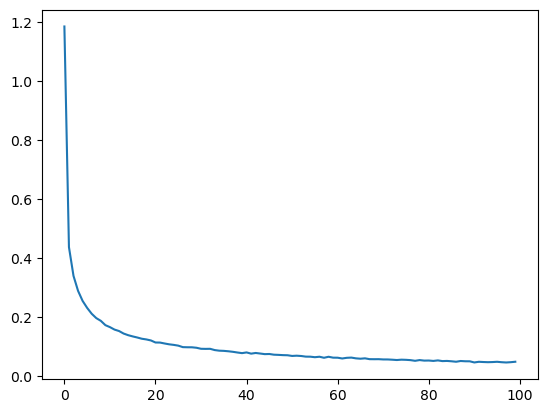

Accuracy on the test set: 97.76%


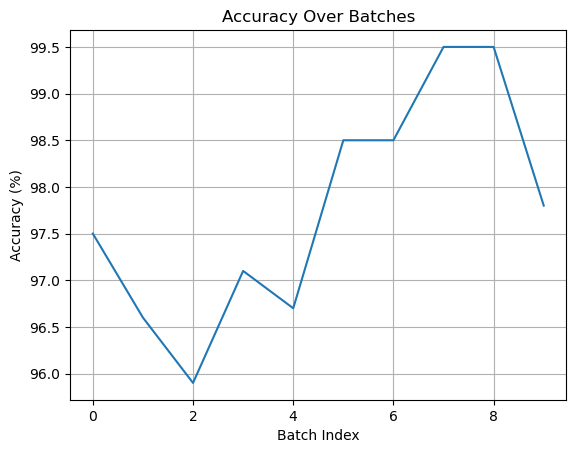

In [6]:
#Ploting the costs vs epochs
plt.plot(costs)
plt.show()


total = 0
correct = 0
accuracies = []

# Set the model to evaluation mode
network.eval()

with torch.no_grad():
    for x, y in testloader:
        output = network(x)  
        _, predicted = torch.max(output, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()
        
        #calculating accuracy for this batch
        batch_accuracy = 100 * (predicted == y).sum().item() / y.size(0)
        accuracies.append(batch_accuracy)

# Final accuracy on the entire test set
accuracy = 100 * correct / total
print(f'Accuracy on the test set: {accuracy:.2f}%')

# Plotting accuracy over batches
plt.plot(accuracies)
plt.title("Accuracy Over Batches")
plt.xlabel("Batch Index")
plt.ylabel("Accuracy (%)")
plt.grid()
plt.show()
